In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

In [325]:
data = pd.read_csv('/content/kidney_disease.csv', index_col=0)

In [326]:
data.shape

(400, 25)

In [327]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd


*  age - age
*  bp - blood pressure
*  sg - specific gravity
*  al - albumin
*  su - sugar
*  rbc - red blood cells
*  pc - pus cell
*  pcc - pus cell clumps
*  ba - bacteria
*  bgr - blood glucose random
*  bu - blood urea
*  sc - serum creatinine
*  sod - sodium
*  pot - potassium
*  hemo - hemoglobin
*  pcv - packed cell volume
*  wc - white blood cell count
*  rc - red blood cell count
*  htn - hypertension
*  dm - diabetes mellitus
*  cad - coronary artery disease
*  appet - appetite
*  pe - pedal edema
*  ane - anemia
*  classification - classification

In [328]:
print(list(data['classification']).count("ckd"), list(data['classification']).count("notckd"))

248 150


In [329]:
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [330]:
data.drop(columns=['rbc', 'wc', 'rc'])
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [331]:
data['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [342]:
data = data.replace(['yes'], 1)
data = data.replace(['no'], 0)

data = data.replace(['ckd\t'], 1)
data = data.replace(['ckd'], 1)
data = data.replace(['notckd'], 0)

data = data.replace(['normal'], 1)
data = data.replace(['abnormal'], 0)

data = data.replace(['present'], 1)
data = data.replace(['notpresent'], 0)

data = data.replace(['good'], 1)
data = data.replace(['poor'], 0)

In [343]:
X = data.drop(["classification"], axis=1)
y = data["classification"]

In [344]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=33)
N, D = X_train.shape

In [345]:
data = data.dropna(axis=0)

In [347]:
X = X.astype('float')
y = y.astype('float')

In [348]:
from sklearn.feature_selection import SelectKBest

sel_ = SelectKBest(mutual_info_classif, k=20).fit(X_train, y_train)
X_train.columns[sel_.get_support()]

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'bgr', 'bu', 'sc',
       'sod', 'hemo', 'pcv', 'rc', 'htn', 'dm', 'appet', 'pe', 'ane'],
      dtype='object')

In [349]:
columns_to_retain = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'bgr', 'bu', 'sc',
                     'sod', 'pot', 'hemo', 'pcv', 'rc', 'htn', 'dm', 'appet', 'pe']
data = data.drop([col for col in data.columns if not col in columns_to_retain], axis=1)

In [350]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,bgr,bu,sc,sod,pot,hemo,pcv,rc,htn,dm,appet,pe
id,,,,,,,,,,,,,,,,,,,,
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,117.0,56.0,3.8,111.0,2.5,11.2,32,3.9,1.0,0,0.0,1.0
9,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,70.0,107.0,7.2,114.0,3.7,9.5,29,3.7,1.0,1,0.0,0.0
11,63.0,70.0,1.010,3.0,0.0,0.0,0.0,1.0,380.0,60.0,2.7,131.0,4.2,10.8,32,3.8,1.0,1,0.0,1.0
14,68.0,80.0,1.010,3.0,2.0,1.0,0.0,1.0,157.0,90.0,4.1,130.0,6.4,5.6,16,2.6,1.0,1,0.0,1.0
20,61.0,80.0,1.015,2.0,0.0,0.0,0.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7,24,3.2,1.0,1,0.0,1.0


In [376]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [377]:
from keras.layers import Dense, Activation

model = Sequential([
    Dense(20 ,activation='relu',input_shape=(24,)),
    Dense(20 ,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 20)                500       
_________________________________________________________________
dense_114 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 21        
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________


In [378]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [379]:
r = model.fit(X_train, y_train, epochs=60, batch_size=24)

Epoch 1/60
5/5 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.5218
Epoch 2/60
5/5 [==============================] - 0s 3ms/step - loss: 0.6469 - accuracy: 0.7261
Epoch 3/60
5/5 [==============================] - 0s 3ms/step - loss: 0.6238 - accuracy: 0.7412
Epoch 4/60
5/5 [==============================] - 0s 4ms/step - loss: 0.5600 - accuracy: 0.8706
Epoch 5/60
5/5 [==============================] - 0s 3ms/step - loss: 0.5348 - accuracy: 0.8862
Epoch 6/60
5/5 [==============================] - 0s 4ms/step - loss: 0.4970 - accuracy: 0.9289
Epoch 7/60
5/5 [==============================] - 0s 3ms/step - loss: 0.4856 - accuracy: 0.9146
Epoch 8/60
5/5 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.9694
Epoch 9/60
5/5 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.9579
Epoch 10/60
5/5 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.9834
Epoch 11/60
5/5 [======================

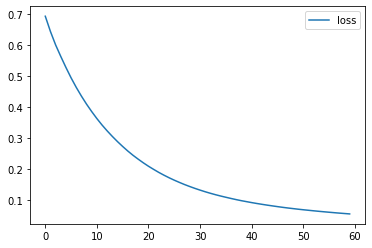

In [380]:
plt.plot(r.history['loss'], label='loss')
plt.legend()

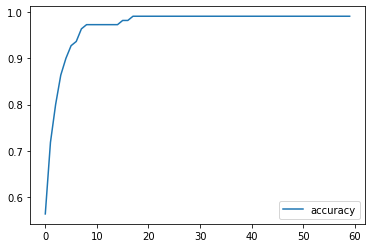

In [381]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()